PA2 Notebook 3: Visualization
===

This is the third notebook for DRWI Pollution Assessment Stage 2 (PA2) analysis.

It reads GeoDataFrames of calculated PA2 results prepared in Notebook 2 and plots hotspot maps.

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

In [1]:
from pathlib import Path
from importlib import reload
import warnings

import pandas    as pd

# geo packages
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx

# packages for viz 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from  matplotlib.colors import LogNorm

# import colorcet and plotting libraries
import colorcet as cc
from colorcet.plotting import swatch, swatches, sine_combs

In [2]:
# Confirm that this repo is in your Python Path
!conda-develop /Users/aaufdenkampe/Documents/Python/pollution-assessment/src

path exists, skipping /Users/aaufdenkampe/Documents/Python/pollution-assessment/src
completed operation for: /Users/aaufdenkampe/Documents/Python/pollution-assessment/src


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
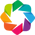

In [3]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

In [4]:
print("Geopandas: ", gpd.__version__)
# print("spatialpandas: ", spd.__version__)
# print("datashader: ", ds.__version__)
# print("pygeos: ", pygeos.__version__)

Geopandas:  0.11.1


## Set Paths


In [5]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [6]:
# Assign relative paths for PA21 data INPUT folders. 
pa1_data_path = project_path / 'stage1/data/'

In [7]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography'

In [8]:
# Assign relative paths for the PA2 data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output'

## Open Files from PA2 Notebook 2 & PA1

In [9]:
%%time
# Read PA2 calculated and combined results from Parquet files
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

CPU times: user 1.43 s, sys: 157 ms, total: 1.59 s
Wall time: 1.5 s


In [10]:
catch_loads_gdf

catchment_hectares  watershed_hectares  \
comid                                               
1748535             6496.7052             6501.69   
1748537             1663.1712             1664.46   
1748539             1639.4128             1640.70   
1748541             3013.8348            12912.30   
1748543             1151.0990             5232.87   
...                       ...                 ...   
932040366           2124.7248          2720941.47   
932040367            788.7859          2717821.26   
932040368            265.0275          2716120.08   
932040369           1106.5294          2889095.67   
932040370           1531.4679          2891976.48   

                                              geom_catchment cluster  \
comid                                                                  
1748535    MULTIPOLYGON (((-8301340.781 5199034.787, -830...     drb   
1748537    MULTIPOLYGON (((-8304909.314 5200051.727, -830...     drb   
1748539    MULTIPOLYGON (((-8315191.630 5191704.467, -831...     drb   
1748541    MULTIPOLYGON (((-8309824.403 5193427.492, -830...     drb   
1748543    MULTIPOLYGON (((-8312514.529 5185023.831, -831...     drb   
...                                                      ...     ...   
932040366  MULTIPOLYGON (((-8403944.327 4826463.781, -840...     drb   
932040367  MULTIPOLYGON (((-8400739.269 4832000.931, -840...     drb   
932040368  MULTIPOLYGON (((-8399608.027 4833463.133, -839...     drb   
932040369  MULTIPOLYGON (((-8409371.984 4816335.622, -840...     drb   
932040370  MULTIPOLYGON (((-8411052.928 4811112.367, -841...     drb   

           sub_focusarea   nord  nordstop         huc12  streamorder  \
comid                                                                  
1748535             <NA>  74914     74914  020401020302            1   
1748537             <NA>  74913     74913  020401020302            1   
1748539             <NA>  74921     74921  020401020305            1   
1748541             <NA>  74911     74915  020401020302            2   
1748543             <NA>  74920     74922  020401020305            2   
...                  ...    ...       ...           ...          ...   
932040366           <NA>  65070     76964  020402060103            7   
932040367           <NA>  65079     76964  020402060103            7   
932040368           <NA>  65080     76960  020402060103            7   
932040369           <NA>  64232     76965  020402040000            7   
932040370           <NA>  64226     76965  020402060105            7   

           headwater  ... tss_loadrate_rem3 tn_loadrate_avoid  \
comid                 ...                                       
1748535            1  ...       -754.235502               0.0   
1748537            1  ...       -802.746034               0.0   
1748539            1  ...       -770.451212               0.0   
1748541            0  ...       -718.840895               0.0   
1748543            0  ...       -750.961313               0.0   
...              ...  ...               ...               ...   
932040366          0  ...       -253.511418               0.0   
932040367          0  ...       -390.461603               0.0   
932040368          0  ...       -640.096341               0.0   
932040369          0  ...        994.343367               0.0   
932040370          0  ...        125.558816               0.0   

          tp_loadrate_avoid  tss_loadrate_avoid  tn_load_xsnps  tn_load_rem3  \
comid                                                                          
1748535                 0.0                 0.0  -98218.212978 -98218.220077   
1748537                 0.0                 0.0  -24619.000241 -24619.002341   
1748539                 0.0                 0.0  -24851.346141 -24851.348141   
1748541                 0.0                 0.0  -45036.645594 -45036.652392   
1748543                 0.0                 0.0  -16731.023105 -16731.023905   
...                     ...              

In [11]:
# Read DRWI geometries from `geography` folder
cluster_gdf = gpd.read_parquet(geography_path / 'cluster_gdf.parquet')
focusarea_gdf = gpd.read_parquet(geography_path /'focusarea_gdf.parquet')


In [12]:
# Test plotting with PA1 parquet files
base_reach_final_gdf = gpd.read_parquet(pa1_data_path  /'base_reach_final_gdf.parquet')
base_catch_final_gdf = gpd.read_parquet(pa1_data_path /'base_catch_final_gdf.parquet')

In [13]:
%%time
# Reproject CRS for all PA1 GeoDataFrames to 3857
gdfs = [
    base_reach_final_gdf, base_catch_final_gdf,
]

for gdf in gdfs:
    gdf.to_crs(epsg=3857, inplace=True)

CPU times: user 4.84 s, sys: 55.2 ms, total: 4.9 s
Wall time: 4.94 s


In [14]:
base_catch_final_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19496 entries, 1748535 to 932040370
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tp_load             19496 non-null  float64 
 1   tn_load             19496 non-null  float64 
 2   tss_load            19496 non-null  float64 
 3   catchment_hectares  19496 non-null  float64 
 4   watershed_hectares  19496 non-null  float64 
 5   tp_loadrate_ws      19496 non-null  float64 
 6   tn_loadrate_ws      19496 non-null  float64 
 7   tss_loadrate_ws     19496 non-null  float64 
 8   maflowv             19496 non-null  float64 
 9   geom_catchment      19496 non-null  geometry
 10  cluster             17358 non-null  category
 11  sub_focusarea       186 non-null    Int64   
 12  nord                18870 non-null  Int64   
 13  nordstop            18844 non-null  Int64   
 14  huc12               19496 non-null  category
 15  streamorder       

# Plot Data for Pollution Assessment

In [15]:
warnings.filterwarnings('ignore', message='.*This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.*')

In [16]:
# Reload module to apply any new edits to functions
reload(pa.calc)
reload(pa.plot)

<module 'pollution_assessment.plot' from '/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/plot.py'>

Reach values (min, mid, max) = (0.009, 0.09, 0.6572788697315387)
Catch values (min, mid, max) = (0.031, 0.31, 3.650792538107121)


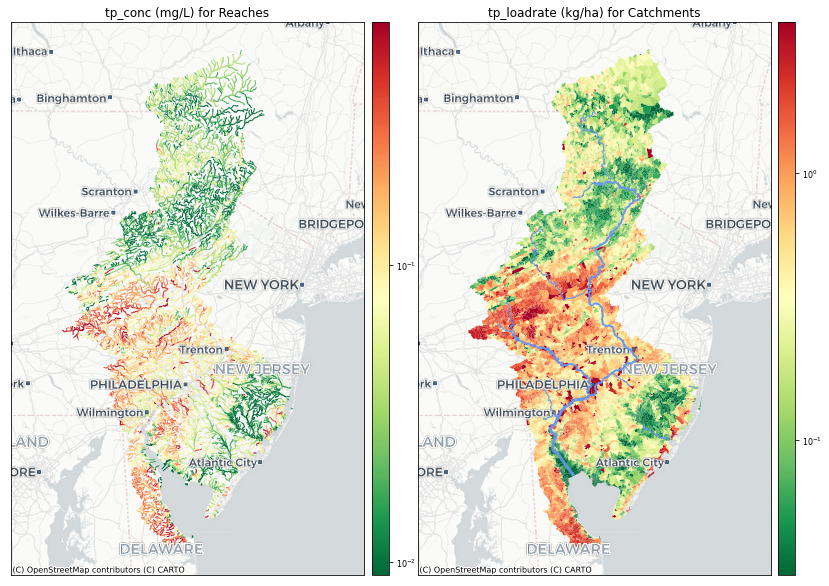

In [17]:
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf,
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='RdYlGn_r',
    cl=None, fa=False, zoom=False, diff=False,
    include_reach=True
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)


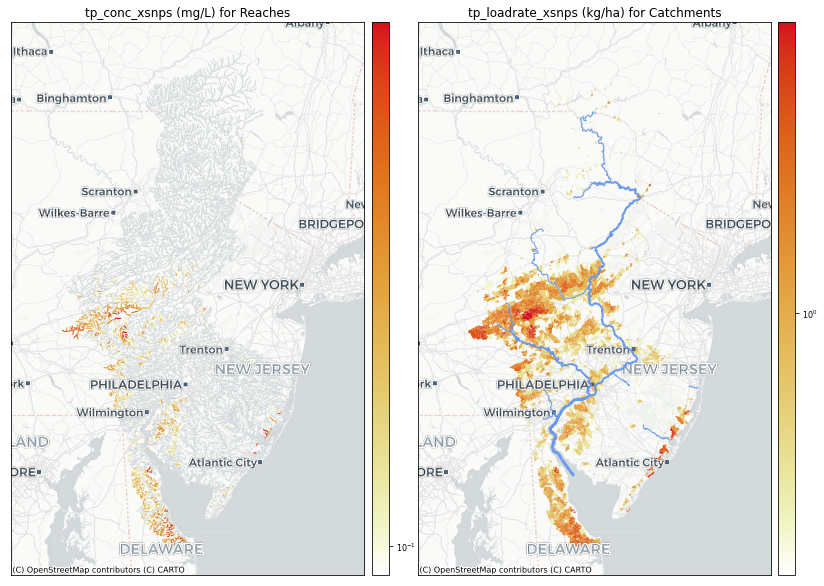

In [18]:
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf,
    'tp_conc_xsnps', 'tp_loadrate_xsnps', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    # colormap='cet_CET_L18',
    cl=None, fa=False, zoom=False, diff=True,
    include_reach=True
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)
Cluster Name =  Brandywine and Christina


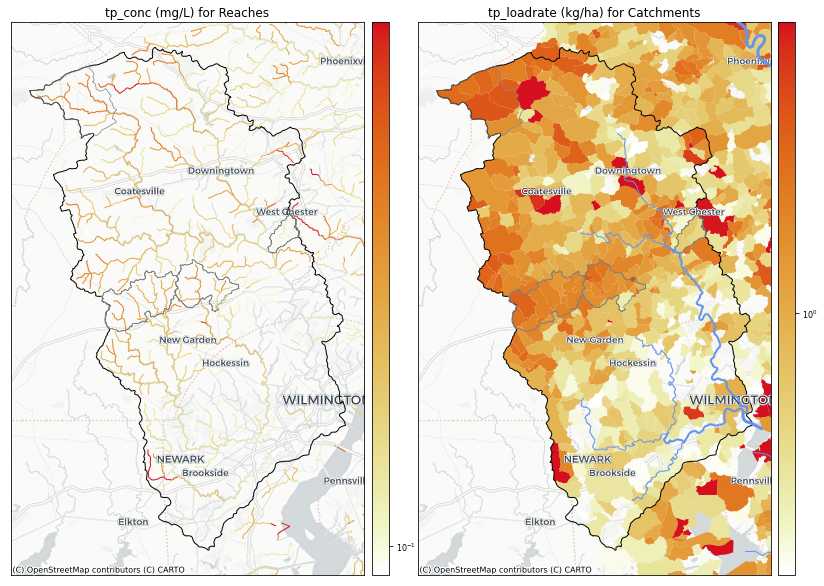

In [19]:
# test on a vertically-aligned cluster
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    diff=True, include_reach = True,
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)
Cluster Name =  Brandywine and Christina


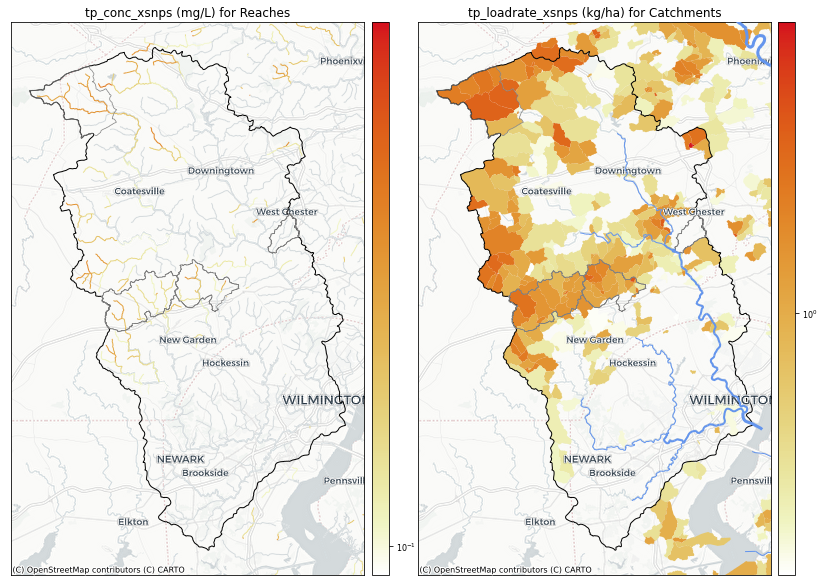

In [20]:
# test on a vertically-aligned cluster
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc_xsnps', 'tp_loadrate_xsnps', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    diff=True, include_reach = True,
)

Reach values (min, mid, max) = (0.09, 0.23270659407666747, 0.6572788697315387)
Catch values (min, mid, max) = (0.31, 0.7955066361139699, 3.650792538107121)
Cluster Name =  Brandywine and Christina


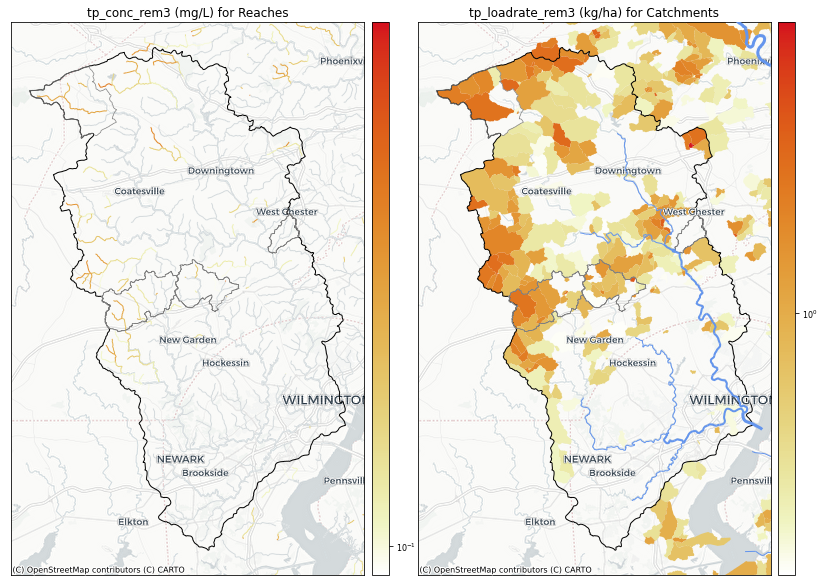

In [21]:
# test on a vertically-aligned cluster
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc_rem3', 'tp_loadrate_rem3', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    diff=True, include_reach = True,
)

In [22]:
# All FAs in one plot for Cluster
cluster_name = cluster_gdf.index.categories[0]

fa_map1 = pa.plot.PlotMaps_FA(reach_concs_gdf, catch_loads_gdf, 
                     'tp_conc_xs', 'tp_loadrate_xsnps', 
                     pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
                     cl=cluster_name, focusarea_gdf=focusarea_gdf, diff=True)

AttributeError: module 'pollution_assessment.plot' has no attribute 'PlotMaps_FA'

In [23]:

pa.plot.Extent_Map(catch_loads_gdf, [fa_map1], cluster_name, cluster_gdf, reach_concs_gdf)

NameError: name 'fa_map1' is not defined

## PA1 plot tests

Reach values (min, mid, max) = (0.009, 0.09, 0.6000019999999989)
Catch values (min, mid, max) = (0.031, 0.31, 1.8956114972242)


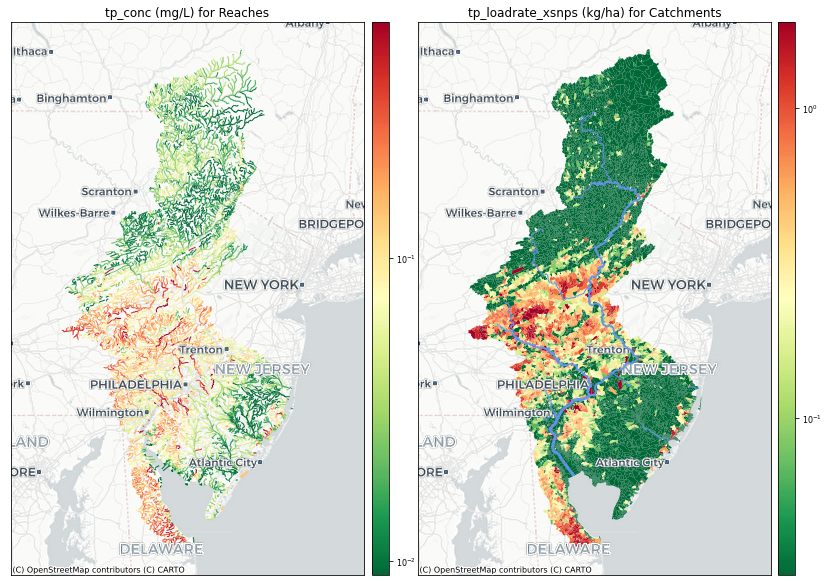

In [ ]:
# Stage 1 overview
pa.plot.PlotMaps(
    base_reach_final_gdf, base_catch_final_gdf,
    'tp_conc', 'tp_loadrate_xsnps', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='RdYlGn_r',
    include_reach=True
)

Reach values (min, mid, max) = (0.009, 0.09, 0.6000019999999989)
Catch values (min, mid, max) = (0.031, 0.31, 3.0635510779536945)


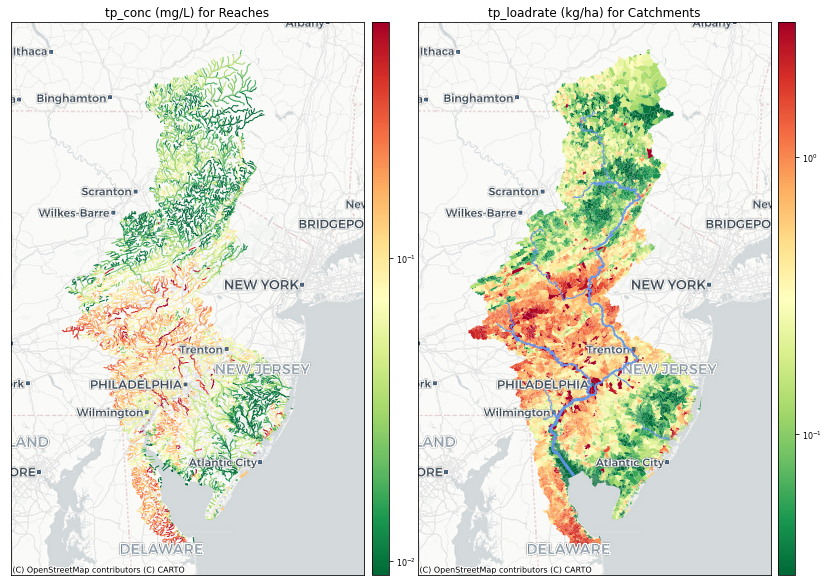

In [ ]:
pa.plot.PlotMaps(
    base_reach_final_gdf, base_catch_final_gdf,
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='RdYlGn_r',
    cl=None, fa=False, zoom=False, diff=False,
    include_reach=True
)